In [116]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
# reading the dataset and using the name column as the index
pokedata = pd.read_csv('../input/pokemon.csv', index_col = 'name')

In [118]:
# reading the first 5 data entries
print(pokedata.head())
print()
print(pokedata.shape)

                              abilities      ...       is_legendary
name                                         ...                   
Bulbasaur   ['Overgrow', 'Chlorophyll']      ...                  0
Ivysaur     ['Overgrow', 'Chlorophyll']      ...                  0
Venusaur    ['Overgrow', 'Chlorophyll']      ...                  0
Charmander     ['Blaze', 'Solar Power']      ...                  0
Charmeleon     ['Blaze', 'Solar Power']      ...                  0

[5 rows x 40 columns]

(801, 40)


In [119]:
# dataset contains the following columns
pokedata.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'percentage_male', 'pokedex_number', 'sp_attack',
       'sp_defense', 'speed', 'type1', 'type2', 'weight_kg', 'generation',
       'is_legendary'],
      dtype='object')

In [120]:
Abilities = pokedata.loc[:,'abilities':'against_water']
Abilities.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
name,,,,,,,,,,,,,,,,,,,
Bulbasaur,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
Ivysaur,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
Venusaur,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
Charmander,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0
Charmeleon,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0


In [121]:
pokedata = pokedata.reset_index()
pokedata.head()


,name,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,Bulbasaur,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,88.1,1,65,65,45,grass,poison,6.9,1,0
1,Ivysaur,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,88.1,2,80,80,60,grass,poison,13.0,1,0
2,Venusaur,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,88.1,3,122,120,80,grass,poison,100.0,1,0
3,Charmander,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,Charmeleon,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [122]:
pokedata = pokedata[['name', 'classfication',"type1","type2",'hp',"attack","defense","sp_attack","sp_defense",
                     "speed","generation","is_legendary"]]
pokedata.columns = pokedata.columns.str.title()
pokedata.head()

,Name,Classfication,Type1,Type2,Hp,Attack,Defense,Sp_Attack,Sp_Defense,Speed,Generation,Is_Legendary
0,Bulbasaur,Seed Pokémon,grass,poison,45,49,49,65,65,45,1,0
1,Ivysaur,Seed Pokémon,grass,poison,60,62,63,80,80,60,1,0
2,Venusaur,Seed Pokémon,grass,poison,80,100,123,122,120,80,1,0
3,Charmander,Lizard Pokémon,fire,NaN,39,52,43,60,50,65,1,0
4,Charmeleon,Flame Pokémon,fire,NaN,58,64,58,80,65,80,1,0


In [123]:
# finding nan values, if any
pokedata.isna().sum()

Name               0
Classfication      0
Type1              0
Type2            384
Hp                 0
Attack             0
Defense            0
Sp_Attack          0
Sp_Defense         0
Speed              0
Generation         0
Is_Legendary       0
dtype: int64

In [124]:
# replacing the nan values in type 2 with None
pokedata.Type2.fillna('None', inplace = True)

In [125]:
# Capitalizing the values in type1 and type2 columns
pokedata.Type1 = pokedata.Type1.str.capitalize()
pokedata.Type2 = pokedata.Type2.str.capitalize()

### pokemon count in each generation

1    151
2    100
3    135
4    107
5    156
6     72
7     80
Name: Generation, dtype: int64


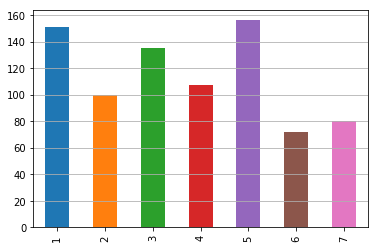

In [126]:
print(pokedata.Generation.value_counts().sort_index())
pokedata.Generation.value_counts().sort_index().plot(kind = 'Bar').grid(True, axis= 'y')

Genartaion 5 has the highest number of pokemons followed by  geneartion 1, 3, 4, 2, 7 and 6 respectively.

### pokemon count based on type

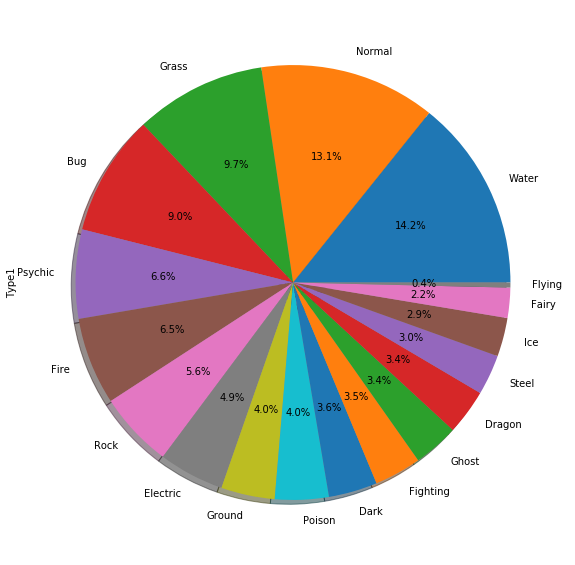

In [127]:
pokedata.Type1.value_counts().plot(figsize = (10,10), kind = 'pie', autopct = '%1.1f%%', shadow = True)

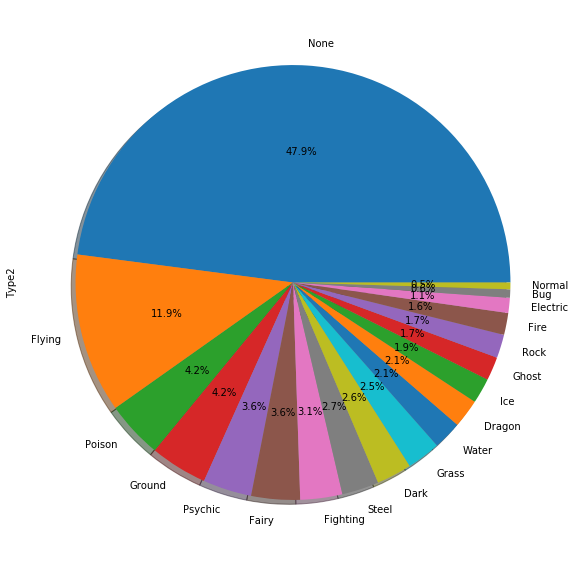

In [128]:
pokedata.Type2.value_counts().plot(figsize = (10,10), kind = 'pie', autopct = '%1.1f%%', shadow = True)

We can see that Water is the primary type of about 14 % pokemons and and about 48% of the pokemons does not have a secondary type.

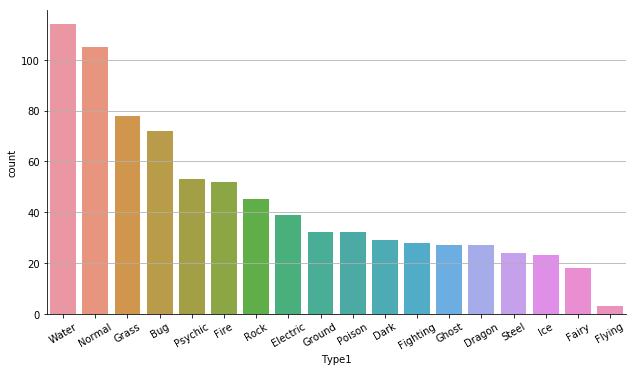

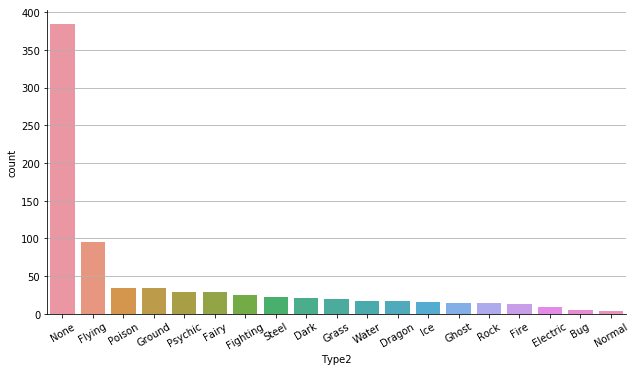

In [129]:
sns.catplot(x = 'Type1', data = pokedata, kind = 'count', order = pokedata.Type1.value_counts().index,
            height = 5, aspect = 1.75)
plt.xticks(rotation = 30)
plt.grid(True, axis = 'y')
sns.catplot(x = 'Type2', data = pokedata, kind = 'count', order = pokedata.Type2.value_counts().index,
            height = 5, aspect = 1.75)
plt.xticks(rotation = 30)
plt.grid(True, axis = 'y')

A lot of information can be derived from the above charts:-
1. While flying is the least common primary type, it is the most common secondary type.
2. Around half of the pokemons do not have a secondary type.
3. Water, Normal and Grass are the most common primary type while Flying, Poison and Ground are the most common secondary types.

### legendary pokemon in each generation

0    731
1     70
Name: Is_Legendary, dtype: int64


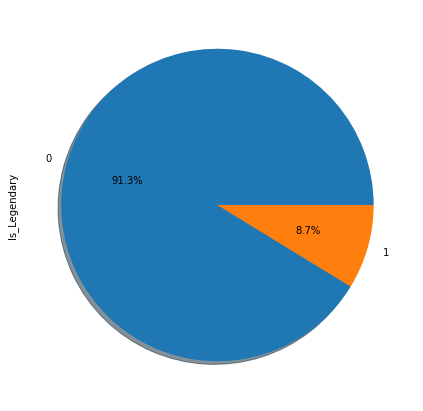

In [144]:
print(pokedata.Is_Legendary.value_counts())
pokedata.Is_Legendary.value_counts().plot(kind = 'pie', autopct = '%1.1f%%', shadow = True, figsize = (7,10))

70(8.7%) out of 801 pokemons are legendary

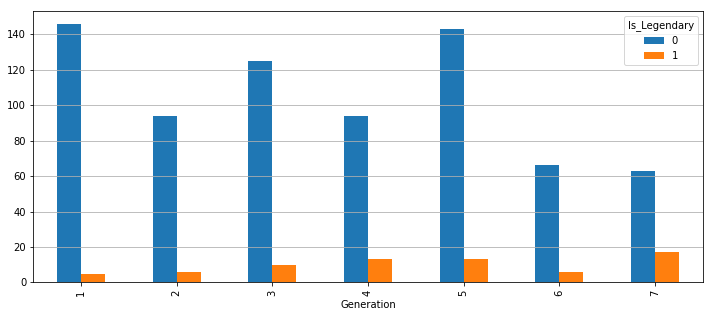

In [146]:
pd.crosstab(pokedata.Generation, pokedata.Is_Legendary).plot(kind= 'bar', figsize = (12,5)).grid(True, axis = 'y')

Generation 7 has the highest number of legendary pokemons while generation 1 has the lowest.

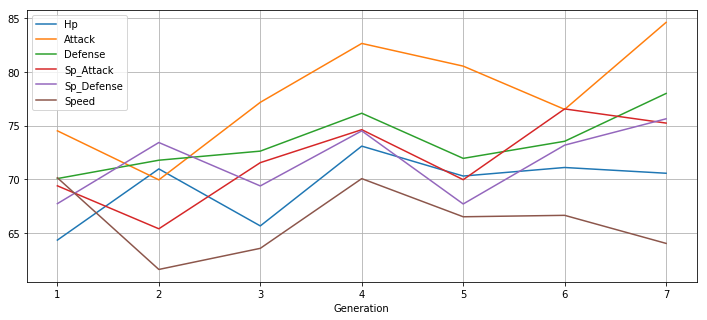

In [132]:
pokemon_stats_generation = pokedata.groupby("Generation").mean()
pokemon_stats_generation[['Hp', 'Attack', 'Defense', 'Sp_Attack', 'Sp_Defense', 'Speed']].plot(kind = 'line',
                                                                                               figsize = (12,5),
                                                                                              grid = True)

1. While generation 7 has the highest Attack, defense, special attack and special defense, they are slow to attack(lowest speed).
2. Generation 4 has the highest hp(hit points).
3. Genaration 1 and 4 has the highest speed


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5]),
 <a list of 18 Text xticklabel objects>)

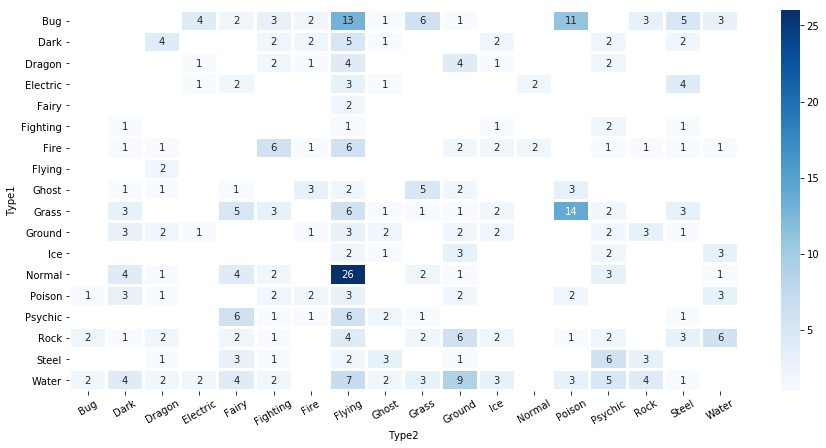

In [133]:
plt.figure(figsize = (15,7))
sns.heatmap(pokedata[pokedata['Type2']!='None'].groupby(['Type1', 'Type2']).size().unstack(),
            annot = True, cmap = 'Blues', linewidth = 2)
plt.xticks(rotation = 30)

Normal-Flying is the most common dual type of pokemon followed by Grass-Poison and Bug-Flying